<a href="https://colab.research.google.com/github/Lipinor/deep_learning_cbpf/blob/master/mnist_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
pip install mnist

In [201]:
import matplotlib.pyplot as plt
import numpy as np
import mnist
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout

In [202]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [203]:
# WIP
model1 = Sequential([
  Dense(64, activation='relu',input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Model compilation
Here we validate the model during training, to monitor its progress. 

In [204]:
from tensorflow.keras.optimizers import Adam

model1.compile(
  optimizer=Adam(),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history1 = model1.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
  validation_data = (test_images, to_categorical(test_labels)),
  verbose=0,
)


# Model Evaluation

In [205]:
model1.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.1135 - accuracy: 0.9668


[0.11345861852169037, 0.9667999744415283]

In [206]:
# Predict on the first 5 test images.
predictions = model1.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]


The model validation presents good accuracy and low loss function value. Therefore, the model probably is not overfitting. 

# Loss and accuracy plots

In [207]:
def la_plots(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    #Epochs
    epochs = range(len(val_loss))

    # Plotting loss

    COLOR = 'white'
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR

    fig1 = plt.figure(figsize=(8,5))
    gs1 = fig1.add_gridspec(1, 1)
    ax1 = fig1.add_subplot(gs1[0, 0])

    ax1.plot(epochs, loss, 'r', label='Training')
    ax1.plot(epochs, val_loss, 'b', label='Validation')
    ax1.set_xlabel('Epochs', size=16)
    ax1.set_ylabel('Loss', size=16)
    #ax1.set_yscale('log')
    ax1.legend()
    plt.show()

    # Plotting accuracy metric

    fig2 = plt.figure(figsize=(8,5))
    gs2 = fig2.add_gridspec(1, 1)
    ax2 = fig2.add_subplot(gs2[0, 0])

    ax2.plot(epochs, accuracy, 'r', label='Training')
    ax2.plot(epochs, val_accuracy, 'b', label='Validation')
    ax2.set_xlabel('Epochs', size=16)
    ax2.set_ylabel('Accuracy', size=16)
    #ax2.set_yscale('log')
    ax2.legend()
    plt.show()

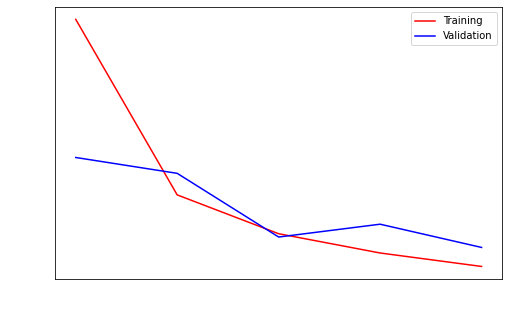

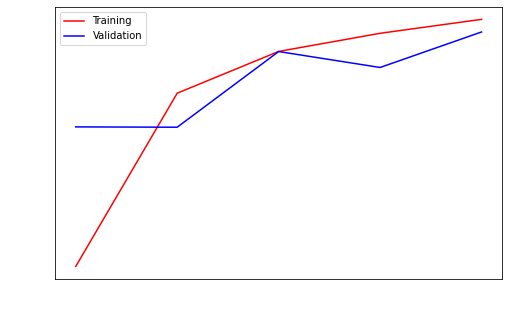

In [208]:
la_plots(history1)

This is the training and validation losses and accuracies for each epoch. As both plots are following the same trend, this is a good indicator that the model is not overfitting.

#Tuning Hyperparameters
Let's see what happens when we change the learning rate of the Adam optimizer.First we are going to create a function to change this parameter. 

In [209]:
def model_lr(x):

    model = Sequential([
      Dense(64, activation='relu',input_shape=(784,)),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax'),
    ])

    model.compile(
      optimizer=Adam(lr=x),
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    history = model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=5,
      batch_size=32,
      validation_data = (test_images, to_categorical(test_labels)),
      verbose=0,
    )

    return history

We will increase the learning rate to 0.005 (the default is 0.001 as shown in the documentation https://keras.io/api/optimizers/adam/).

In [210]:
hist_lr1 = model_lr(0.005)

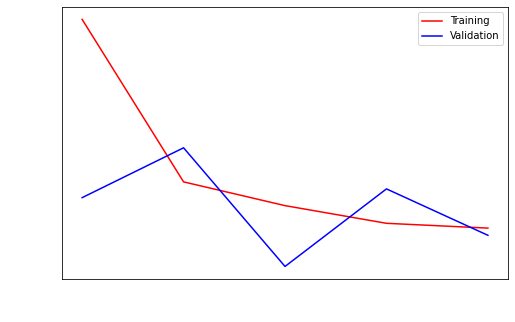

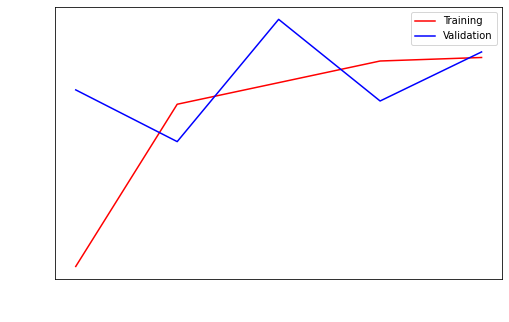

In [211]:
la_plots(hist_lr1)

Still approximately 90% of accuracy in the validation data. That still sounds good.
Let's try with a learning rate 10 times higher than the default (0.01):

In [212]:
hist_lr2 = model_lr(0.01)

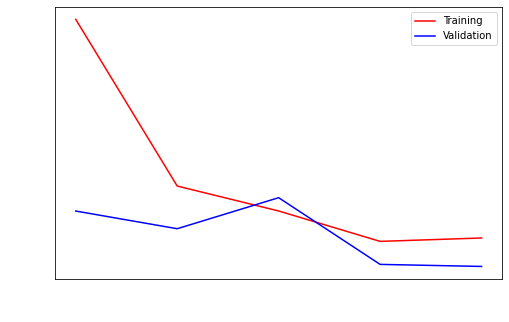

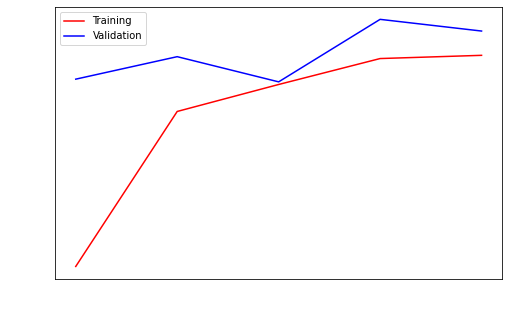

In [213]:
la_plots(hist_lr2)

Here we notice that the loss function is higher than the previous cases, but the validation accuracy is still in a good value of approximately 80%. 
What about lr = 0.1?

In [214]:
hist_lr3 = model_lr(0.1)

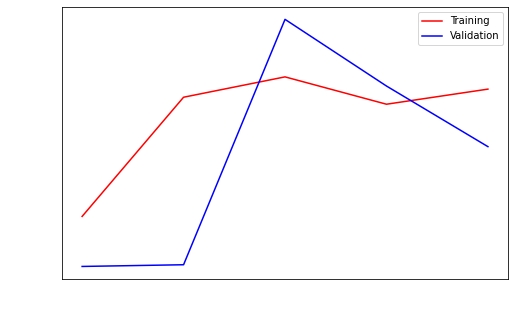

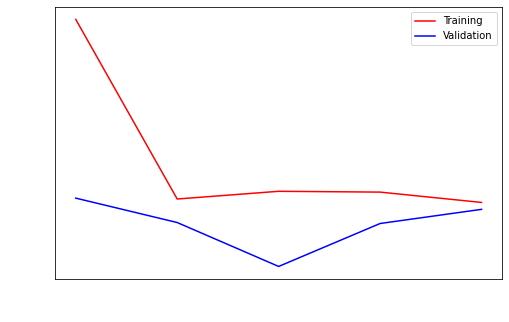

In [215]:
la_plots(hist_lr3)

Using a learning rate by 100 times higher than the default lowers the accuracy to a terrible value of around 10%. 

What about we lower the learning rate from the 0.001 default?

In [216]:
hist_lr4 = model_lr(0.0001)

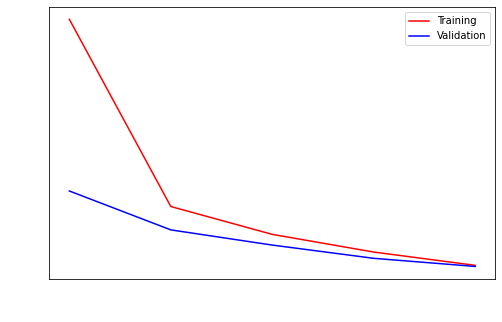

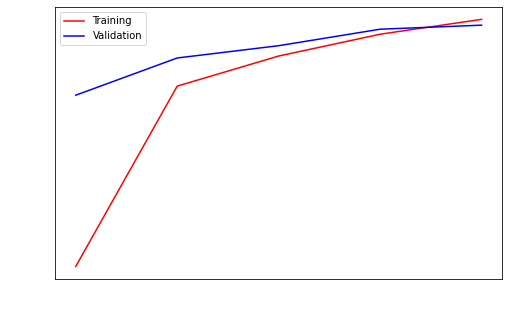

In [217]:
la_plots(hist_lr4)

Still good. Lowering a bit more:

In [218]:
hist_lr5 = model_lr(0.00001)

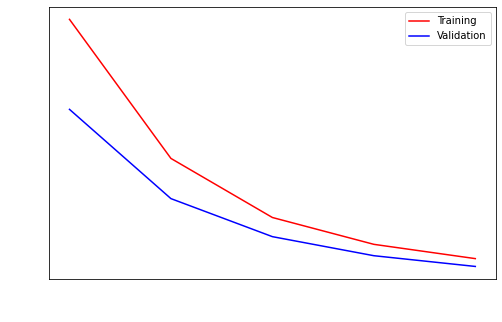

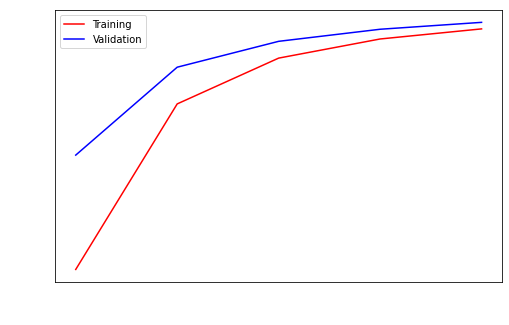

In [219]:
la_plots(hist_lr5)

Accuracy still around 90% and the model does not seem to overfit. Decreasing the learning rate again:

In [220]:
hist_lr6 = model_lr(0.000001)

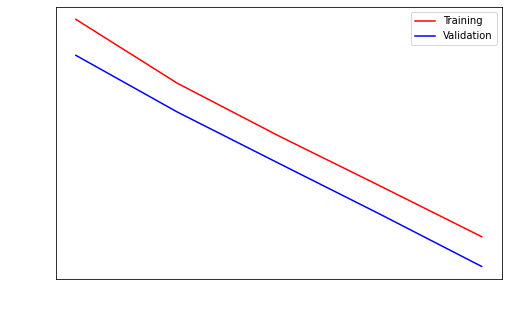

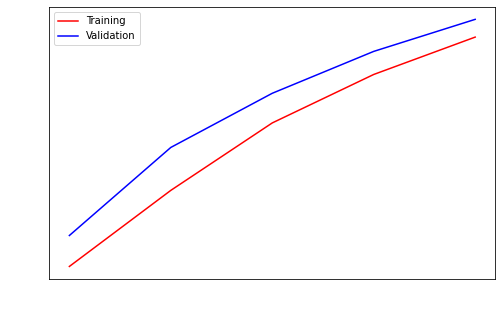

In [221]:
la_plots(hist_lr6)

Lowering the learning rate 1000 times the default ruins the model, we get a high loss and low accuracy.

#Batch size and Epochs
What about changing the batch size and number of epochs?

In [239]:
def model_batch_epochs(batch,epoch):

    model = Sequential([
      Dense(64, activation='relu',input_shape=(784,)),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax'),
    ])

    model.compile(
      optimizer=Adam(),
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    history = model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=epoch,
      batch_size=batch,
      validation_data = (test_images, to_categorical(test_labels)),
      verbose=0,
    )

    return history

The batch size we are using is 32. First, let's change only the number of epochs.

In [240]:
hist_batch1 = model_batch_epochs(32,50)

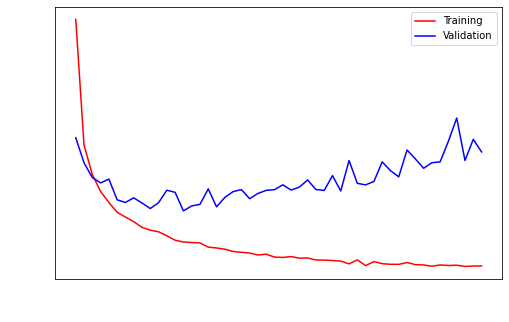

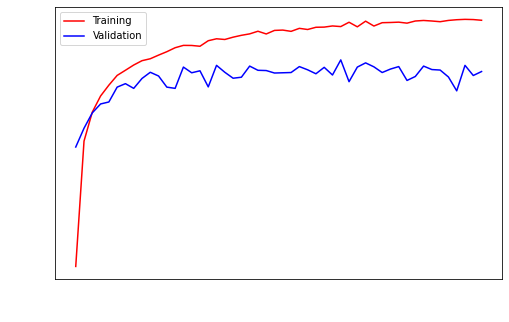

In [241]:
la_plots(hist_batch1)

Increasing the number of epochs keeps a high accuracy, but the model seems to be overfitting as shown in the loss plot. Notice that the validation line does not follow the same trend as the training line.

Now let's fix the epochs to 5 and change the batch size.

In [243]:
hist_batch2 = model_batch_epochs(64,5)

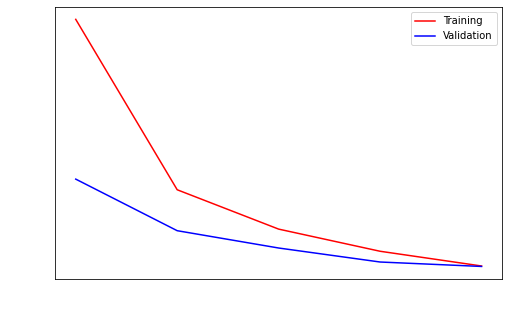

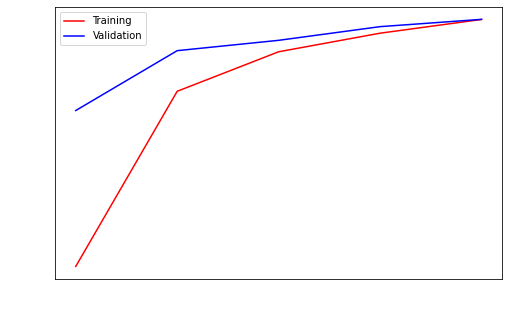

In [244]:
la_plots(hist_batch2)

In [245]:
hist_batch3 = model_batch_epochs(128,5)

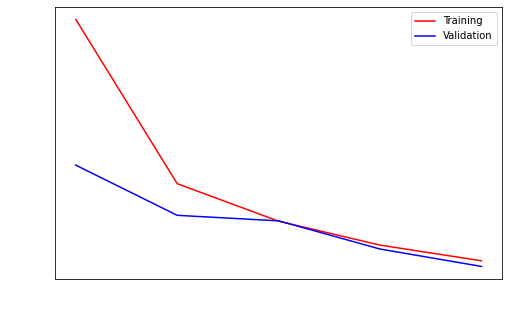

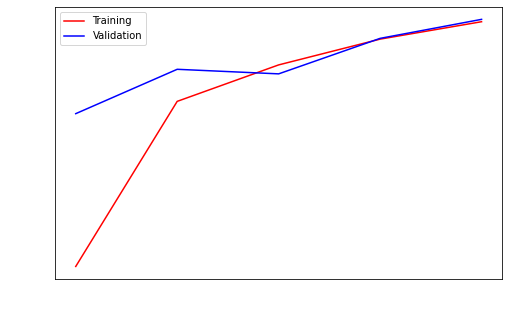

In [246]:
la_plots(hist_batch3)

In [247]:
hist_batch4 = model_batch_epochs(256,5)

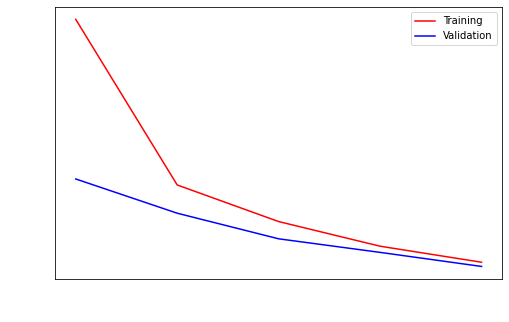

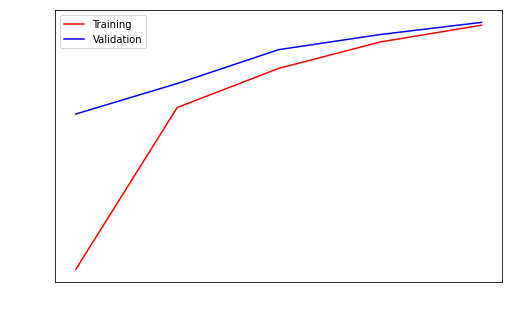

In [248]:
la_plots(hist_batch4)

The loss after the training is higher, but the accuraccy is still very good.

What about we change both batch size and epochs?

In [249]:
hist_batch5 = model_batch_epochs(64,10)

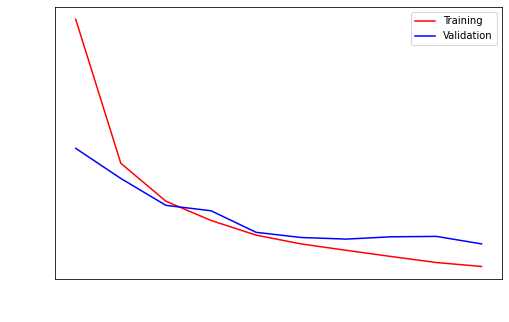

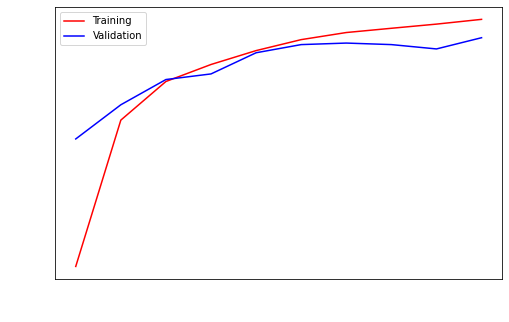

In [250]:
la_plots(hist_batch5)

Still good loss and good accuracy values.

#Network Depth
What about increasing the network depth?

In [251]:
model_deeper1 = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])


model_deeper1.compile(
  optimizer=Adam(),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

history3 = model_deeper1.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
  validation_data = (test_images, to_categorical(test_labels)),
)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3552 - accuracy: 0.8893 - val_loss: 0.2109 - val_accuracy: 0.9367
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1790 - accuracy: 0.9447 - val_loss: 0.1825 - val_accuracy: 0.9440
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1482 - accuracy: 0.9543 - val_loss: 0.1405 - val_accuracy: 0.9555
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1270 - accuracy: 0.9599 - val_loss: 0.1242 - val_accuracy: 0.9616
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1105 - accuracy: 0.9655 - val_loss: 0.1617 - val_accuracy: 0.9489


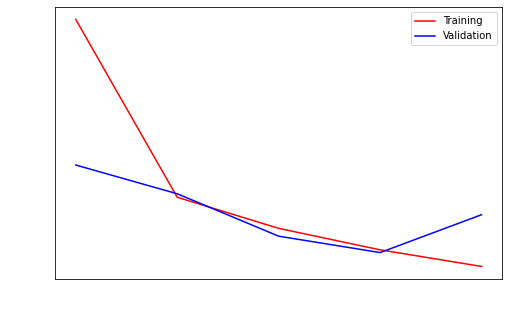

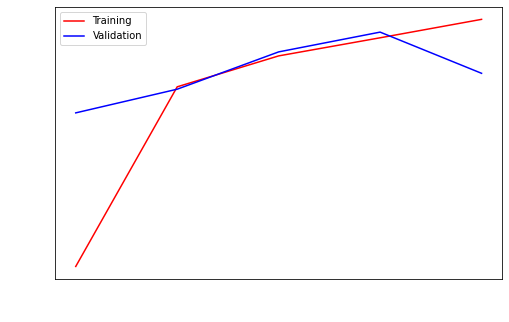

In [252]:
la_plots(history3)

Still good values for validation loss and accuracy.

#Activations
What happens when we use the sigmoid activation function instead of ReLU?

In [253]:
model_sigmoid = Sequential([
  Dense(64, activation='sigmoid', input_shape=(784,)),
  Dense(64, activation='sigmoid'),
  Dense(10, activation='softmax'),
])


model_sigmoid.compile(
  optimizer=Adam(),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

history_sig = model_sigmoid.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
  validation_data = (test_images, to_categorical(test_labels)),
)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5757 - accuracy: 0.8469 - val_loss: 0.2679 - val_accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2311 - accuracy: 0.9321 - val_loss: 0.1922 - val_accuracy: 0.9445
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1705 - accuracy: 0.9495 - val_loss: 0.1498 - val_accuracy: 0.9541
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1378 - accuracy: 0.9603 - val_loss: 0.1326 - val_accuracy: 0.9592
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1159 - accuracy: 0.9653 - val_loss: 0.1122 - val_accuracy: 0.9661


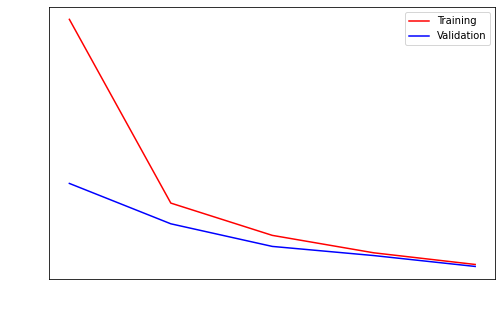

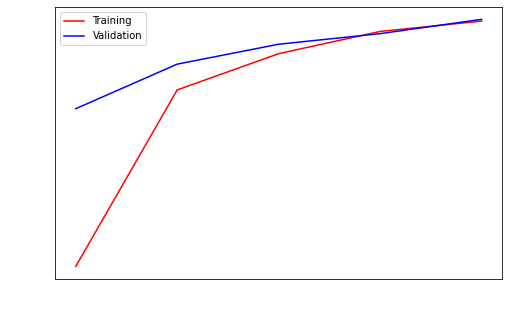

In [254]:
la_plots(history_sig)

Changing from ReLU to Sigmoid does not appear to ruin the model.

#Dropouts
Finally, we are going to add some dropouts to the layers.

In [257]:
model_dropout = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dropout(0.5),
  Dense(64, activation='relu'),
  Dropout(0.5),
  Dense(10, activation='softmax'),
])

model_dropout.compile(
  optimizer=Adam(),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

history_dropout = model_dropout.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
  validation_data = (test_images, to_categorical(test_labels)),
  verbose=0,
)

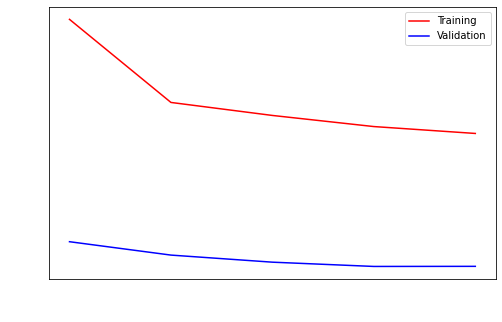

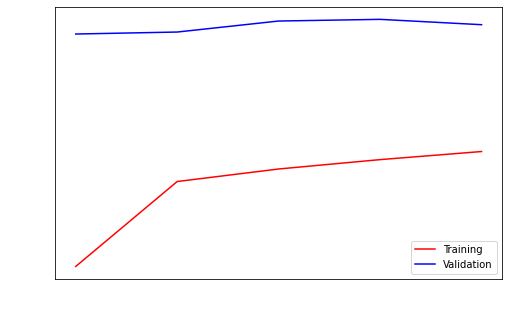

In [258]:
la_plots(history_dropout)